In [3]:
from Precode import *
import numpy

data = np.load('AllSamples.npy')

In [4]:
k1,i_point1,k2,i_point2 = initial_S1('9314') # please replace 0111 with your last four digit of your ID

Strategy 1: k and initial points


In [5]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

3
[[5.14167285 5.71626939]
 [2.36057145 6.00796623]
 [8.09209017 3.39065059]]
5
[[6.09952696 9.0178614 ]
 [8.21925014 9.11712554]
 [6.2396717  6.55049457]
 [6.47011829 5.54035543]
 [2.18568667 3.11739024]]


In [6]:
print(i_point1.shape) 
print(i_point2.shape) 

(3, 2)
(5, 2)


In [7]:
def k_means_clustering(data, k, i_points):
    # Initialize k centroids with the provided initialization points
    centroids = i_points[:k]
    loss_history = []
    previous_centroids = None
    while True:
        # Assign each data point to its closest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)
        # Compute the new centroids as the mean of the data points in each cluster
        for j in range(k):
            cluster_points = data[cluster_assignments == j]
            if len(cluster_points) > 0:
                centroids[j] = np.mean(cluster_points, axis=0)
        # Compute the loss as the sum of squared distances to the centroids
        loss = np.sum((data - centroids[cluster_assignments])**2)
        loss_history.append(loss)
        # Check for convergence
        if previous_centroids is not None and np.allclose(centroids, previous_centroids):
            break
        previous_centroids = centroids.copy()
    return centroids, loss_history

In [8]:
for k in range(2, 11):
    centroids, loss_history = k_means_clustering(data, k, np.concatenate((i_point1, i_point2)))
    print(f"k={k}: final centroids={centroids}, final loss={loss_history[-1]}")

k=2: final centroids=[[6.80713674 5.40112426]
 [3.01682343 4.47741928]], final loss=2498.1135603167713
k=3: final centroids=[[6.49724962 7.52297293]
 [2.61946868 5.96519477]
 [5.55524182 2.18980958]], final loss=1294.2984174853177
k=4: final centroids=[[7.25262683 2.40015826]
 [2.90547741 6.90512276]
 [3.22853009 2.52404863]
 [6.62592538 7.57614917]], final loss=789.237972217795
k=5: final centroids=[[5.37514379 4.53101654]
 [2.68198633 2.09461587]
 [7.55616782 2.23516796]
 [3.22202355 7.15937996]
 [7.49365367 8.52417952]], final loss=592.0694342732747
k=6: final centroids=[[2.69776781 2.05456448]
 [2.50007776 6.83980802]
 [7.55616782 2.23516796]
 [4.92373109 7.83373154]
 [7.91430998 8.51990981]
 [5.33214241 4.44448111]], final loss=469.13171566558185
k=7: final centroids=[[3.02624833 1.30802927]
 [2.63998081 4.65650058]
 [7.55616782 2.23516796]
 [2.28668565 7.46165524]
 [7.91430998 8.51990981]
 [5.2063443  7.51671816]
 [5.34560332 4.20335478]], final loss=387.0819294403862
k=8: final 

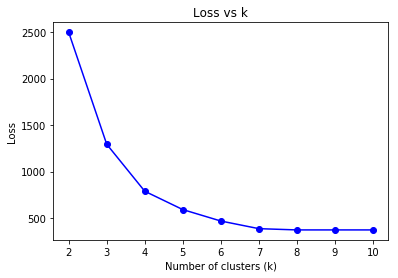

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
# Compute the loss for k=2 to k=10
ks = range(2, 11)
losses = []
for k in ks:
    _, loss_history = k_means_clustering(data, k, np.concatenate((i_point1, i_point2)))
    losses.append(loss_history[-1])

# Plot the loss vs k
plt.plot(ks, losses, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Loss')
plt.title('Loss vs k')
plt.show()